In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

### Data Loader

In [2]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

### Data shuffle, Model Generator, Training

In [3]:
# X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=42)
# model = DecisionTreeClassifier(random_state=0)
# model.fit(X_train, y_train)
# overfitting

In [4]:
# print('훈련세트 정확도 : {:3f}'.format(model.score(X_train, y_train)))
# print('테스트세트 정확도 : {:3f}'.format(model.score(X_test, y_test)))

### Grid Search 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=42)
model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Predict and evaluate

In [6]:
pred = model.predict(X_test)
score = accuracy_score(pred,y_test, normalize=True)
# score = accuracy_score(pred,y_test, normalize=False)  #예측한 건수로 출력
score

0.951048951048951

### Feature importance

In [7]:
print(f'특성중요도\n{model.feature_importances_}')

특성중요도
[0.         0.02654067 0.         0.         0.         0.
 0.         0.71010827 0.         0.         0.         0.
 0.         0.013032   0.         0.         0.         0.01737208
 0.         0.         0.08952349 0.0912992  0.         0.03522339
 0.01005736 0.         0.         0.         0.00684355 0.        ]


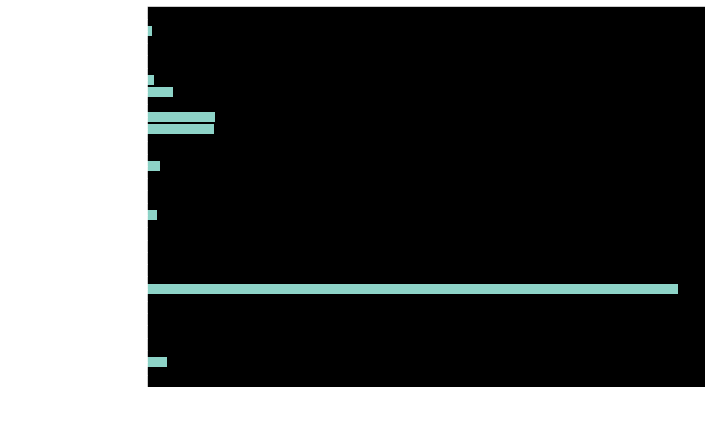

In [8]:
def plot_feature_importances_cancer(model):
    plt.figure(figsize=(10,7))
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel('Feature Impotance')
    plt.ylabel('Features')
    plt.ylim(-1, n_features) # 그림의 범위를 수동으로 지정할때
    
plot_feature_importances_cancer(model)
